In [1]:
import tensorflow as tf
import keras.utils as image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from keras.models import load_model
model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
img_path = r'tiny-imagenet-200\train\n01443537\images\n01443537_44.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
result = decode_predictions(features)

1/1 [==============================] - 0s 481ms/step


In [3]:
print(result[0])

[('n01443537', 'goldfish', 0.87327826), ('n03388043', 'fountain', 0.022389675), ('n03344393', 'fireboat', 0.018712485), ('n03662601', 'lifeboat', 0.017837077), ('n09472597', 'volcano', 0.008854744)]


In [4]:
arr = []
for i in result[0]:
    arr.append(i[2])
arr = np.array(arr)
a = np.argmax(arr)
print(result[0][a][1])

goldfish


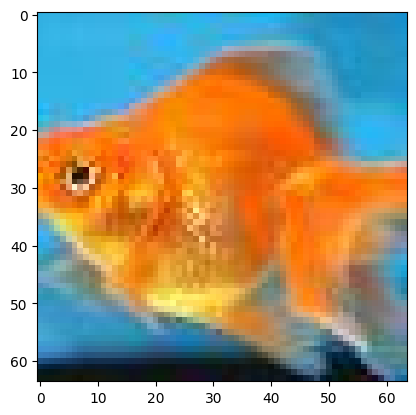

In [5]:
image1 = mpimg.imread(img_path)
plt.imshow(image1)
plt.show()

In [6]:
img_path = r'tiny-imagenet-200\train\n01774384\images\n01774384_45.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
result = decode_predictions(features)

1/1 [==============================] - 0s 174ms/step


In [7]:
print(result[0])

[('n04275548', 'spider_web', 0.29251415), ('n01773549', 'barn_spider', 0.18187316), ('n01773797', 'garden_spider', 0.1386709), ('n01773157', 'black_and_gold_garden_spider', 0.0907881), ('n01774384', 'black_widow', 0.03627443)]


In [8]:
arr = []
for i in result[0]:
    arr.append(i[2])
arr = np.array(arr)
a = np.argmax(arr)
print(result[0][a][1])

spider_web


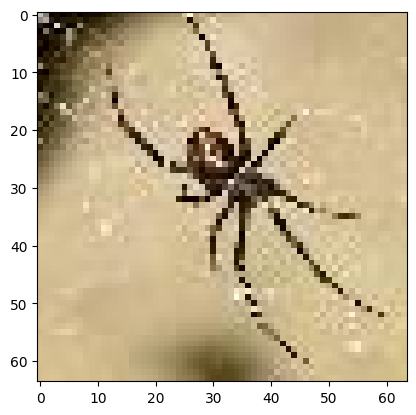

In [9]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
image = mpimg.imread(img_path)
plt.imshow(image)
plt.show()

In [10]:
model.save('VGG.h5')

In [11]:
loaded_m = load_model('VGG.h5')
loaded_m.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     